<a href="https://colab.research.google.com/github/Udaykamal2005/OIBSIP/blob/main/Project_1_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Upload CSV from your local machine (uncomment if needed)
from google.colab import files
uploaded = files.upload()  # choose your CSV file when prompted
# After upload, the file will appear in the notebook's working directory.


Saving retail_sales_dataset (3).csv to retail_sales_dataset (3).csv


In [ ]:
# Cell 3: Load CSV (change filename if needed)
import pandas as pd

# If you uploaded using Cell 1, set filename = next(iter(uploaded.keys()))
# Otherwise set filename to the CSV you saw in Cell 2, e.g. 'retail_sales_dataset (3).csv'
# Example:
# filename = 'retail_sales_dataset (3).csv'

# --- EDIT THIS if you uploaded and want to use that file ---
try:
    filename  # if user pre-defined filename in notebook
except NameError:
    filename = 'retail_sales_dataset (3).csv'  # default — change if different

def try_read(path):
    for enc in ['utf-8', 'latin1', 'cp1252']:
        try:
            return pd.read_csv(path, encoding=enc, low_memory=False)
        except Exception:
            pass
    # fallback to semicolon
    return pd.read_csv(path, sep=';', low_memory=False)

df = try_read(filename)
print("Loaded:", filename, "shape:", df.shape)
df.head()


Loaded: retail_sales_dataset (3).csv shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Cell 4: Quick inspection
import numpy as np
print("Columns:", list(df.columns))
print("\nData types:")
print(df.dtypes)
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nNumeric summary:")
display(df.describe(include=[np.number]).transpose())


Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

Data types:
Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

Missing values per column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Numeric summary:


,count,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
Age,1000.0,41.392,13.681430,18.0,29.00,42.0,53.00,64.0
Quantity,1000.0,2.514,1.132734,1.0,1.00,3.0,4.00,4.0
Price per Unit,1000.0,179.890,189.681356,25.0,30.00,50.0,300.00,500.0
Total Amount,1000.0,456.000,559.997632,25.0,60.00,135.0,900.00,2000.0


In [ ]:
# Cell 5: Clean column names for easier handling
orig_cols = df.columns.tolist()
df.columns = [c.strip().lower().replace(' ', '_') for c in orig_cols]
print("Old columns:", orig_cols)
print("New columns:", df.columns.tolist())
df.head()


Old columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']
New columns: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']


,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
# Cell 6: Detect and parse a date column (auto-detects any column name containing 'date')
date_col = None
for c in df.columns:
    if 'date' in c:
        date_col = c
        break

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True, dayfirst=False)
    parsed_count = df[date_col].notna().sum()
    print(f"Detected and parsed date column '{date_col}' with {parsed_count} non-null values.")
    if parsed_count>0:
        print("Earliest date:", df[date_col].min())
        print("Latest   date:", df[date_col].max())
else:
    print("No date column auto-detected. If you know the date column name, set `date_col = 'your_column'` and re-run.")


Detected and parsed date column 'date' with 1000 non-null values.
Earliest date: 2023-01-01 00:00:00
Latest   date: 2024-01-01 00:00:00


/tmp/ipython-input-2876125191.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True, dayfirst=False)


In [ ]:
# Cell 7: Detect quantity, unit price, and sales columns (heuristic), coerce to numeric
qty_col = next((c for c in df.columns if c in ['quantity','qty','units','no_of_units','quantity_ordered']), None)
price_col = next((c for c in df.columns if c in ['unitprice','unit_price','price','price_per_unit','unit_price_(inc_vat)','unit_price_excl_vat']), None)
sales_col = next((c for c in df.columns if c in ['sales','total','amount','total_sales','sales_value','total_amount']), None)

# fallback name search
if not qty_col:
    qty_col = next((c for c in df.columns if 'qty' in c or 'quantity' in c), None)
if not price_col:
    price_col = next((c for c in df.columns if 'price' in c or 'unit_price' in c), None)
if not sales_col:
    sales_col = next((c for c in df.columns if 'sales' in c or 'amount' in c or 'total' in c), None)

print("Detected -> quantity:", qty_col, "unit price:", price_col, "sales:", sales_col)

if qty_col:
    df[qty_col] = pd.to_numeric(df[qty_col], errors='coerce')
if price_col:
    df[price_col] = pd.to_numeric(df[price_col], errors='coerce')
if sales_col:
    df[sales_col] = pd.to_numeric(df[sales_col], errors='coerce')

print("Types after coercion:")
print(df[[c for c in [qty_col, price_col, sales_col] if c is not None]].dtypes)


Detected -> quantity: quantity unit price: price_per_unit sales: total_amount
Types after coercion:
quantity          int64
price_per_unit    int64
total_amount      int64
dtype: object


In [ ]:
# Cell 8: Create 'sales' column if not present
if 'sales' not in df.columns and sales_col is None:
    if qty_col and price_col:
        df['sales'] = df[qty_col].fillna(0) * df[price_col].fillna(0)
        sales_col = 'sales'
        print("Created 'sales' as quantity * unit_price.")
    else:
        print("Cannot create 'sales' automatically because quantity or price column not found.")
else:
    # If we detected a different sales column earlier, ensure it's named 'sales' for consistency
    if sales_col and sales_col != 'sales':
        df.rename(columns={sales_col: 'sales'}, inplace=True)
        sales_col = 'sales'
        print(f"Renamed detected sales column to 'sales'.")
    else:
        print("'sales' column present.")

print("sales column sample:")
display(df['sales'].head())


Renamed detected sales column to 'sales'.
sales column sample:


,sales
0,150
1,1000
2,30
3,500
4,100


In [ ]:
# Cell 9: Top products / categories by total sales (heuristic to find product/category column)
product_col = next((c for c in df.columns if c in ['product','description','item_description','product_description','product_name','stockcode','product_category','category']), None)
if not product_col:
    product_col = next((c for c in df.columns if 'product' in c or 'description' in c or 'item' in c or 'stock' in c or 'category' in c), None)

if product_col and 'sales' in df.columns:
    top_products = df.groupby(product_col)['sales'].sum().sort_values(ascending=False).head(10).reset_index()
    print("Top 10 products/categories by sales (product column detected as):", product_col)
    display(top_products)
else:
    print("Could not compute top products — product column or 'sales' column missing. Detected product_col:", product_col)


Top 10 products/categories by sales (product column detected as): product_category


,product_category,sales
0,Electronics,156905
1,Clothing,155580
2,Beauty,143515


,year_month,sales
0,2023-01,35450
1,2023-02,44060
2,2023-03,28990
3,2023-04,33870
4,2023-05,53150
5,2023-06,36715
6,2023-07,35465
7,2023-08,36960
8,2023-09,23620
9,2023-10,46580


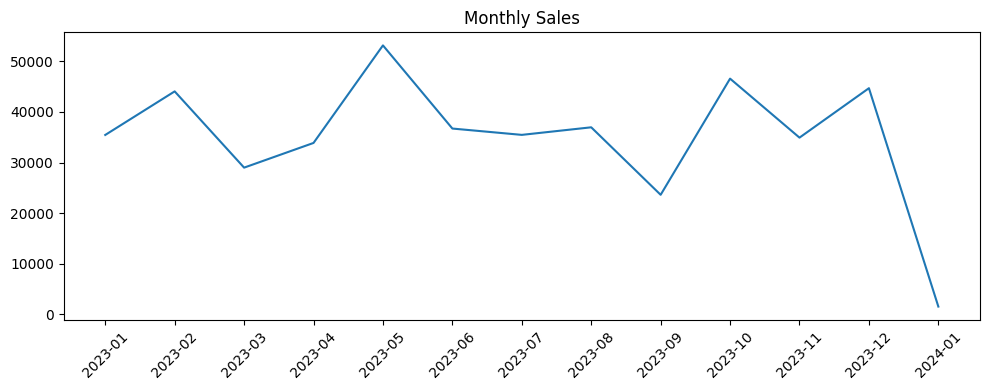

In [ ]:
# Cell 10: Monthly aggregation and plot (requires parsed date column and 'sales')
import matplotlib.pyplot as plt

# ensure we have date_col and sales
if 'sales' in df.columns and 'date' in df.columns:
    # use the parsed date column (the code in Cell 6 tried to detect 'date' already)
    date_col = 'date'  # if your date column has different name, change here
    df['year_month'] = df[date_col].dt.to_period('M').astype(str)
    monthly = df.groupby('year_month')['sales'].sum().reset_index()
    display(monthly)
    plt.figure(figsize=(10,4))
    plt.plot(monthly['year_month'], monthly['sales'])
    plt.xticks(rotation=45)
    plt.title('Monthly Sales')
    plt.tight_layout()
    plt.show()
else:
    print("Monthly aggregation skipped. Make sure you have a parsed date column named 'date' and a 'sales' column.")


DATA SET - 2

In [ ]:
# 1. Colab: install libs (only if not already installed)
!pip install -q seaborn scikit-learn

# 2. Imports and upload using your method
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()  # choose your CSV file (e.g. menu.csv) when prompted
filename = next(iter(uploaded))  # get the uploaded filename
print("Loaded file:", filename)

# 3. Read CSV (robust)
try:
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
except Exception as e:
    print("pd.read_csv failed with error:", e)
    # try common alternatives
    try:
        df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1')
        print("Read with latin1 encoding")
    except Exception as e2:
        raise RuntimeError("Failed to read CSV: " + str(e2))

# Quick peek
print("Shape:", df.shape)
df.head()


Saving menu (1).csv to menu (1).csv
Loaded file: menu (1).csv
Shape: (260, 24)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
# 1) Inspect columns, dtypes, and missing values
print("Columns:", list(df.columns))
print("\nData types:\n")
display(df.dtypes)
print("\nMissing values per column:")
display(df.isnull().sum())

# 2) Standardize column names (lowercase, strip)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
print("Normalized columns:", df.columns.tolist())

# 3) If numeric columns are read as strings (e.g. 'calories'), coerce them
# Replace commas, parentheses, percent signs etc if present
def coerce_numeric(col):
    df[col] = df[col].astype(str).str.replace(r'[^\d\.-]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Common nutrition columns (adjust names based on your dataset)
nutr_cols_guess = ['calories','total_fat','saturated_fat','trans_fat','cholesterol',
                   'sodium','carbohydrates','dietary_fiber','sugars','protein']
for c in nutr_cols_guess:
    if c in df.columns:
        coerce_numeric(c)

print("\nAfter coercion - dtypes:")
display(df.dtypes)

# 4) Report rows with many missing values
df['missing_count'] = df.isnull().sum(axis=1)
print("Rows with >=3 missing values:", df[df['missing_count'] >= 3].shape[0])
# Optionally drop the helper column now
df.drop(columns=['missing_count'], inplace=True)


Columns: ['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

Data types:



,0
Category,object
Item,object
Serving Size,object
Calories,int64
Calories from Fat,int64
Total Fat,float64
Total Fat (% Daily Value),int64
Saturated Fat,float64
Saturated Fat (% Daily Value),int64
Trans Fat,float64



Missing values per column:


,0
Category,0
Item,0
Serving Size,0
Calories,0
Calories from Fat,0
Total Fat,0
Total Fat (% Daily Value),0
Saturated Fat,0
Saturated Fat (% Daily Value),0
Trans Fat,0


Normalized columns: ['category', 'item', 'serving_size', 'calories', 'calories_from_fat', 'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat', 'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol', 'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)', 'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber', 'dietary_fiber_(%_daily_value)', 'sugars', 'protein', 'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)', 'calcium_(%_daily_value)', 'iron_(%_daily_value)']

After coercion - dtypes:


,0
category,object
item,object
serving_size,object
calories,int64
calories_from_fat,int64
total_fat,float64
total_fat_(%_daily_value),int64
saturated_fat,float64
saturated_fat_(%_daily_value),int64
trans_fat,float64


Rows with >=3 missing values: 0


In [ ]:
# Summary statistics for numeric columns
num = df.select_dtypes(include=[np.number])
print("Numeric columns:", num.columns.tolist())
display(num.describe().T)

# Top 10 highest calorie items (adjust column name if different)
cal_col = 'calories' if 'calories' in df.columns else num.columns[0]
top_cal = df.sort_values(by=cal_col, ascending=False).loc[:, ['item_name' if 'item_name' in df.columns else df.columns[0], cal_col]].head(10)
print("Top 10 items by calories:")
display(top_cal)

# Count of items by category if a category column exists
if 'category' in df.columns:
    print("\nItems per category:")
    display(df['category'].value_counts().head(20))


Numeric columns: ['calories', 'calories_from_fat', 'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat', 'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol', 'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)', 'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber', 'dietary_fiber_(%_daily_value)', 'sugars', 'protein', 'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)', 'calcium_(%_daily_value)', 'iron_(%_daily_value)']


,count,mean,std,min,25%,50%,75%,max
calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
calories_from_fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
total_fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
total_fat_(%_daily_value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
saturated_fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
saturated_fat_(%_daily_value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
trans_fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
cholesterol_(%_daily_value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


Top 10 items by calories:


,category,calories
82,Chicken & Fish,1880
32,Breakfast,1150
31,Breakfast,1090
34,Breakfast,1050
33,Breakfast,990
81,Chicken & Fish,940
253,Smoothies & Shakes,930
249,Smoothies & Shakes,850
246,Smoothies & Shakes,850
251,Smoothies & Shakes,820



Items per category:


,count
category,
Coffee & Tea,95
Breakfast,42
Smoothies & Shakes,28
Chicken & Fish,27
Beverages,27
Beef & Pork,15
Snacks & Sides,13
Desserts,7
Salads,6


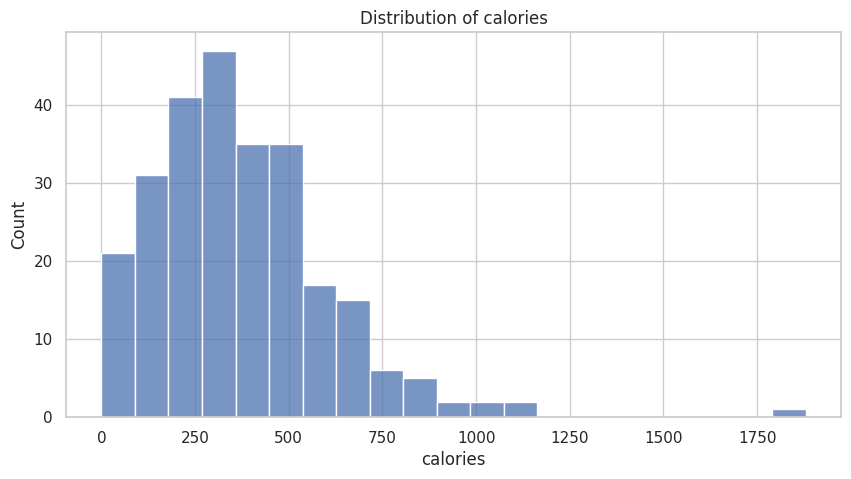

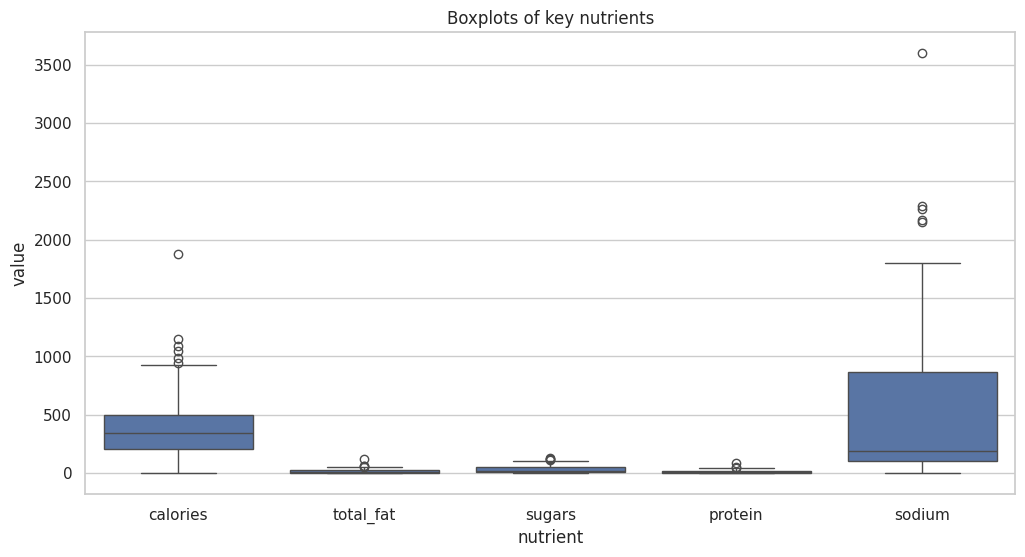

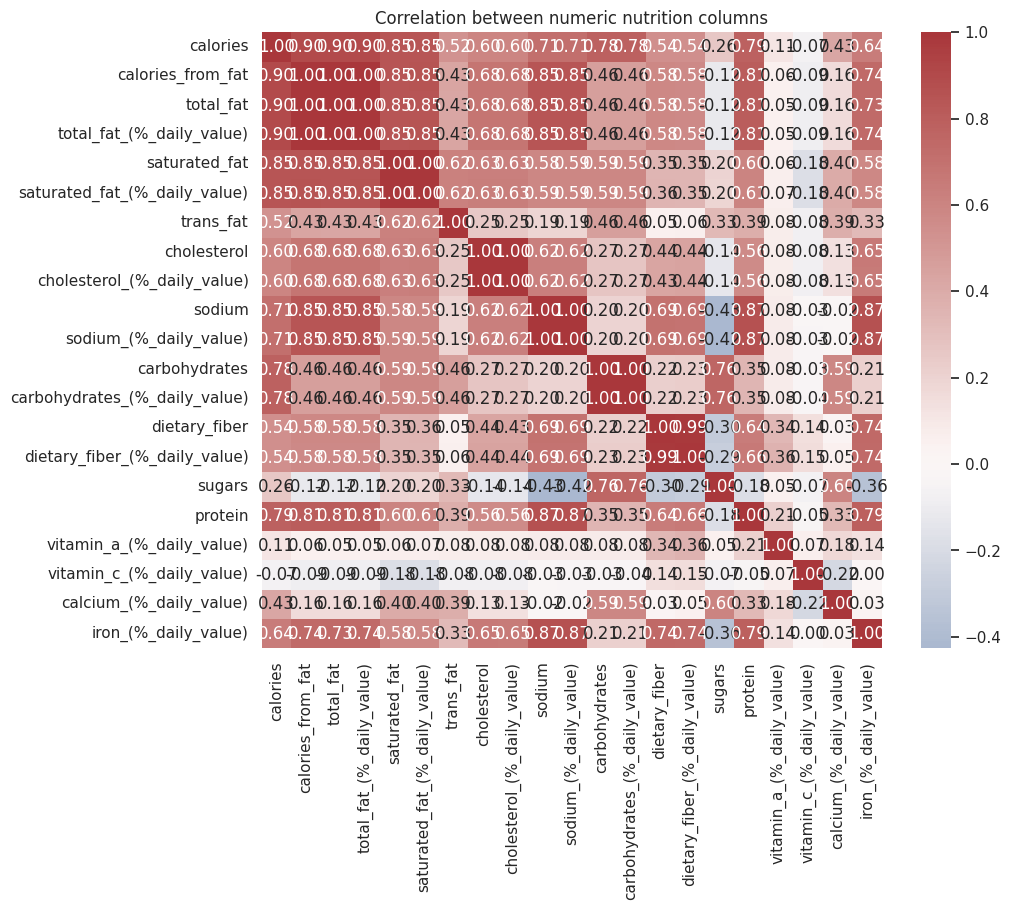

In [ ]:
# Basic plotting settings
sns.set(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)

# 1) Histogram of calories
if cal_col in df.columns:
    plt.figure()
    sns.histplot(df[cal_col].dropna(), kde=False)
    plt.title("Distribution of " + cal_col)
    plt.xlabel(cal_col)
    plt.show()

# 2) Boxplots for a few nutrition columns
plot_cols = [c for c in ['calories','total_fat','sugars','protein','sodium'] if c in df.columns]
if plot_cols:
    plt.figure(figsize=(12,6))
    df_plot = df[plot_cols].melt(var_name='nutrient', value_name='value')
    sns.boxplot(x='nutrient', y='value', data=df_plot)
    plt.title("Boxplots of key nutrients")
    plt.show()

# 3) Correlation heatmap
if len(num.columns) >= 2:
    plt.figure(figsize=(10,8))
    corr = num.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
    plt.title("Correlation between numeric nutrition columns")
    plt.show()


In [ ]:
# Average calories by category (if exists)
if 'category' in df.columns and 'calories' in df.columns:
    avg_by_cat = df.groupby('category')['calories'].mean().sort_values(ascending=False)
    print("Avg calories by category:")
    display(avg_by_cat)

# Items with unusually high sodium (> 90th percentile)
if 'sodium' in df.columns:
    thresh = df['sodium'].dropna().quantile(0.90)
    high_sodium = df[df['sodium'] > thresh][['item_name' if 'item_name' in df.columns else df.columns[0], 'sodium']]
    print(f"Items above 90th percentile sodium ({thresh:.0f} mg):")
    display(high_sodium)


Avg calories by category:


,calories
category,
Chicken & Fish,552.962963
Smoothies & Shakes,531.428571
Breakfast,526.666667
Beef & Pork,494.000000
Coffee & Tea,283.894737
Salads,270.000000
Snacks & Sides,245.769231
Desserts,222.142857
Beverages,113.703704


Items above 90th percentile sodium (1322 mg):


,category,sodium
7,Breakfast,1410
9,Breakfast,1420
18,Breakfast,1470
24,Breakfast,1480
25,Breakfast,1480
26,Breakfast,1510
27,Breakfast,1560
28,Breakfast,1680
29,Breakfast,1590
30,Breakfast,1700


Clustering features: ['calories', 'calories_from_fat', 'total_fat', 'total_fat_(%_daily_value)', 'saturated_fat', 'saturated_fat_(%_daily_value)', 'trans_fat', 'cholesterol', 'cholesterol_(%_daily_value)', 'sodium', 'sodium_(%_daily_value)', 'carbohydrates', 'carbohydrates_(%_daily_value)', 'dietary_fiber', 'dietary_fiber_(%_daily_value)', 'sugars', 'protein', 'vitamin_a_(%_daily_value)', 'vitamin_c_(%_daily_value)', 'calcium_(%_daily_value)', 'iron_(%_daily_value)']
Inertias (k=1..6): [5460.0, 3616.501569837211, 2862.8272527193094, 2393.240044914138, 2108.8378845285506, 1863.007412949132]


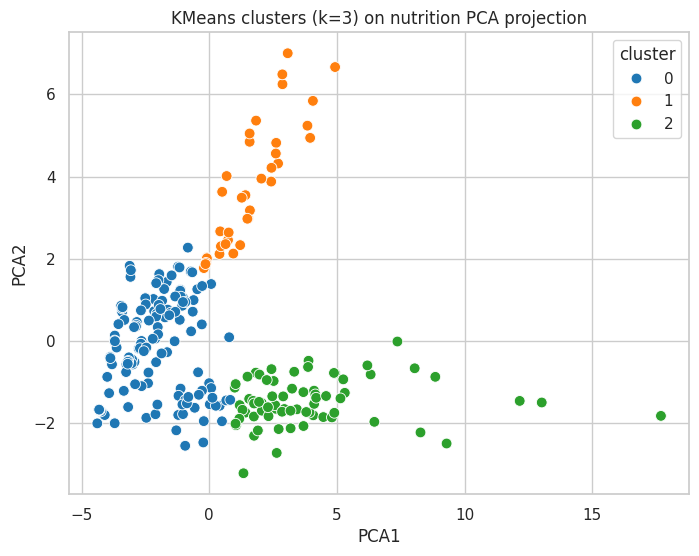

Cluster sizes:


,count
cluster,
0,153
2,71
1,36


In [ ]:
# Select features for clustering (only numeric nutrition columns)
features = [c for c in num.columns if c not in ['some_id_column_if_any']]  # adjust
print("Clustering features:", features)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

X = df[features].dropna()  # drop rows with NaNs in features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to pick k (prints inertia for k=1..6)
inertias = []
for k in range(1,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
print("Inertias (k=1..6):", inertias)

# Choose k=3 as an example
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)

# Project to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=labels, palette='tab10', s=60)
plt.title(f"KMeans clusters (k={k}) on nutrition PCA projection")
plt.xlabel("PCA1"); plt.ylabel("PCA2")
plt.legend(title='cluster')
plt.show()

# Add cluster labels back to DataFrame (align by index)
clustered = X.copy()
clustered['cluster'] = labels
print("Cluster sizes:")
display(clustered['cluster'].value_counts())


In [ ]:
# Example: create cleaned_df with only columns we want
cleaned_df = df.copy()

# Fill obvious NaNs (example: numeric cols fill with median)
for c in cleaned_df.select_dtypes(include=[np.number]).columns:
    cleaned_df[c] = cleaned_df[c].fillna(cleaned_df[c].median())

# Save
outname = "menu_cleaned.csv"
cleaned_df.to_csv(outname, index=False)
print("Saved cleaned file to", outname)

# Provide a download link in Colab
from google.colab import files as gfiles
gfiles.download(outname)


Saved cleaned file to menu_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving menu (1).csv to menu (1) (1).csv
shape (260, 24)
                               count        mean         std  min      25%  \
calories                       260.0  368.269231  240.269886  0.0  210.000   
calories_from_fat              260.0  127.096154  127.875914  0.0   20.000   
total_fat                      260.0   14.165385   14.205998  0.0    2.375   
total_fat_(%_daily_value)      260.0   21.815385   21.885199  0.0    3.750   
saturated_fat                  260.0    6.007692    5.321873  0.0    1.000   
saturated_fat_(%_daily_value)  260.0   29.965385   26.639209  0.0    4.750   
trans_fat                      260.0    0.203846    0.429133  0.0    0.000   
cholesterol                    260.0   54.942308   87.269257  0.0    5.000   
cholesterol_(%_daily_value)    260.0   18.392308   29.091653  0.0    2.000   
sodium                         260.0  495.750000  577.026323  0.0  107.500   
sodium_(%_daily_value)         260.0   20.676923   24.034954  0.0    4.750   
carbohyd

,category,item,serving_size,calories,calories_from_fat,total_fat,total_fat_(%_daily_value),saturated_fat,saturated_fat_(%_daily_value),trans_fat,...,carbohydrates,carbohydrates_(%_daily_value),dietary_fiber,dietary_fiber_(%_daily_value),sugars,protein,vitamin_a_(%_daily_value),vitamin_c_(%_daily_value),calcium_(%_daily_value),iron_(%_daily_value)
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,116,39,7,28,17,36,15,2,30,40
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,...,111,37,6,23,17,36,15,2,25,40
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,15.4 oz (437 g),1050,450,50.0,77,16.0,81,0.0,...,115,38,7,28,18,35,4,2,25,30
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,14.9 oz (423 g),990,410,46.0,70,16.0,78,0.0,...,110,37,6,23,17,35,0,2,25,30
81,Chicken & Fish,Chicken McNuggets (20 piece),11.4 oz (323 g),940,530,59.0,91,10.0,50,0.0,...,59,20,3,12,0,44,0,8,4,10
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),16.2 oz (460 g),930,290,33.0,50,20.0,102,1.0,...,139,46,2,7,128,20,25,0,70,10
249,Smoothies & Shakes,Chocolate Shake (Large),22 fl oz cup,850,210,23.0,36,15.0,74,1.0,...,141,47,2,8,120,19,30,0,60,15
246,Smoothies & Shakes,Strawberry Shake (Large),22 fl oz cup,850,210,24.0,36,15.0,75,1.0,...,140,47,0,0,123,18,30,0,70,0
251,Smoothies & Shakes,Shamrock Shake (Large),22 fl oz cup,820,210,23.0,35,15.0,73,1.0,...,135,45,0,0,115,18,30,0,60,0


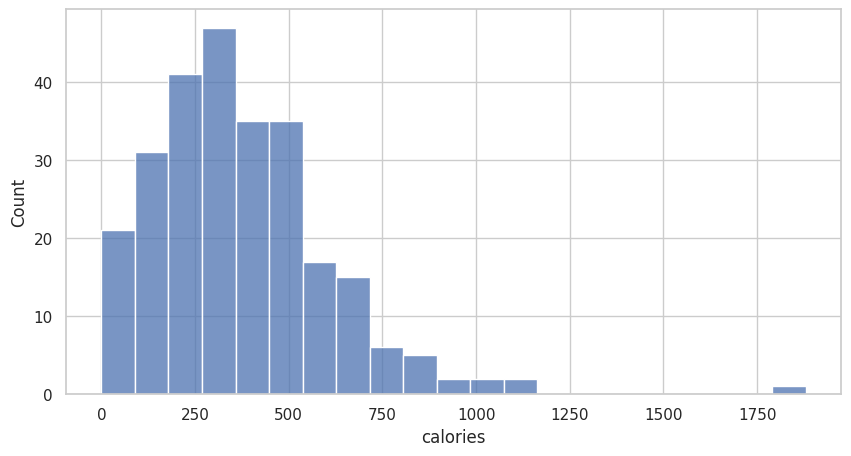

In [ ]:
!pip install -q seaborn scikit-learn
from google.colab import files
import io, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
uploaded = files.upload(); fn = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[fn])); print("shape", df.shape)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
# coerce numeric for common columns
for c in ['calories','total_fat','saturated_fat','trans_fat','cholesterol','sodium','carbohydrates','dietary_fiber','sugars','protein']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(r'[^\d\.-]','',regex=True), errors='coerce')
print(df.select_dtypes(include=[np.number]).describe().T)
if 'calories' in df.columns:
    display(df.sort_values('calories', ascending=False).head(10))
%matplotlib inline
sns.histplot(df['calories'].dropna()); plt.show()
